**Script Name:** Image Segmentation (Public).ipynb </br>
**Description:** This script is used for demonstrating how to apply various image segmentation techniques in Python using OpenCV. It covers global, adaptive, and Otsu's thresholding, a simple region growing example, and basic and advanced morphological operations (opening, closing, top-hat, black-hat, and gradient). </br>
**Author:** Jetsada Arnin, PhD </br>
**Date:** March 29, 2023 </br>
*Copyright (c) 2023 Jetsada Arnin*



In [1]:
#@title Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Load the medical image
# Read an input image in grayscale mode
image = cv2.imread("./img/flower.jpg", cv2.IMREAD_GRAYSCALE)

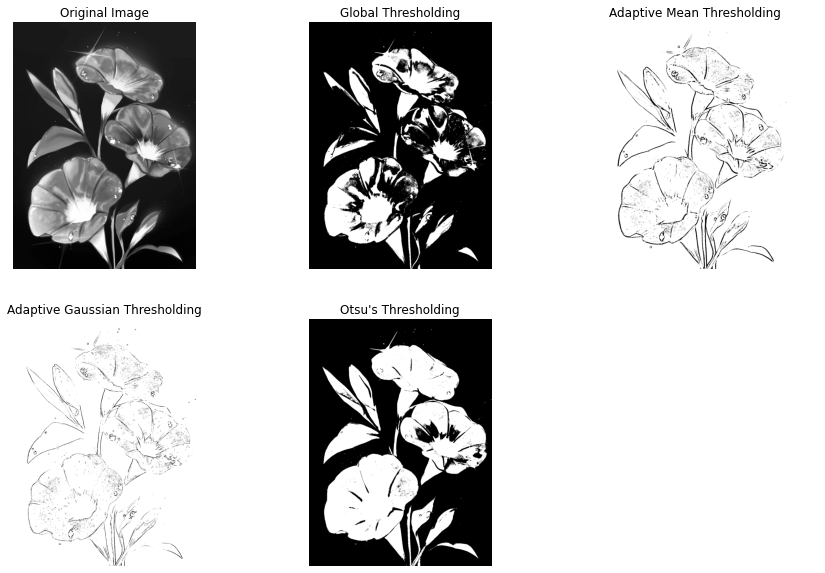

In [26]:
#@title Thresholding Techniques
# [Global Thresholding]
# --> The global threshold value is used in binary thresholding to determine if a pixel 
# should be set to the maximum value (white) or the minimum value (black). 
# By changing the global threshold value, you can control the balance between the 
# foreground and background regions in the segmented image.

# Define the global threshold value
global_thresh_value = 127

# Perform global thresholding
_, global_thresh = cv2.threshold(image, global_thresh_value, 255, cv2.THRESH_BINARY)


# [Adaptive Mean Thresholding]
# --> Block size determines the size of the neighborhood used to calculate the adaptive threshold
# value for each pixel. You can experiment with different block sizes to see how it affects 
# the adaptiveness of the thresholding. Larger block sizes make the thresholding more adaptive 
# to local changes in the image but may cause noise in the segmented image.
# -->The constant value is subtracted from the mean or weighted mean calculated for each neighborhood 
# in adaptive thresholding. Changing this constant value can help you fine-tune the thresholding
# results, allowing for better separation of the foreground and background regions.

# Define parameters
block_size = 15
c = 20

# Perform adaptive mean thresholding
mean_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)

# Perform Adaptive Gaussian Thresholding
gaussian_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c)


# [Otsu's Thresholding]
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Display the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(global_thresh, cmap='gray')
axs[0, 1].set_title('Global Thresholding')
axs[0, 2].imshow(mean_thresh, cmap='gray')
axs[0, 2].set_title('Adaptive Mean Thresholding')
axs[1, 0].imshow(gaussian_thresh, cmap='gray')
axs[1, 0].set_title('Adaptive Gaussian Thresholding')
axs[1, 1].imshow(otsu_thresh, cmap='gray')
axs[1, 1].set_title("Otsu's Thresholding")

# Remove axis labels
for ax in axs.ravel():
    ax.axis('off')

plt.show()

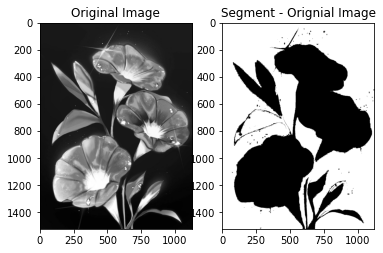

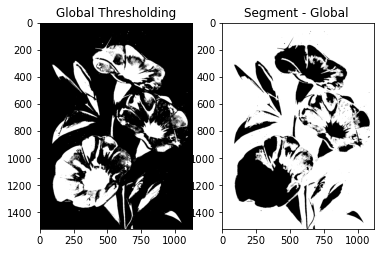

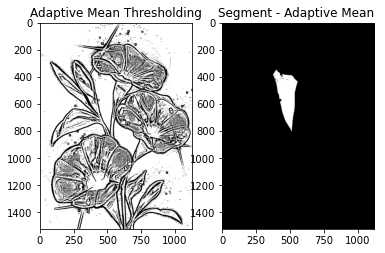

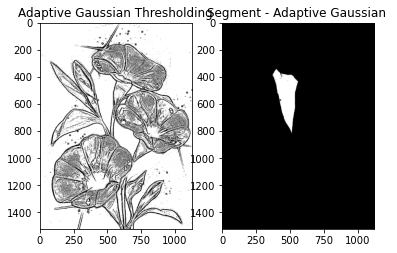

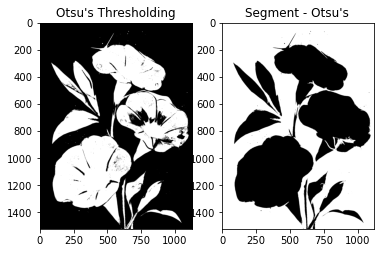

In [22]:
#@title Region Growing (Simple Example)
def region_growing(img, seed, threshold=10):
    rows, cols = img.shape
    region = np.zeros((rows, cols), dtype=np.uint8)
    region_points = [seed]
    region[seed] = 255
    
    while region_points:
        point = region_points.pop(0)
        x, y = point
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        
        for neighbor in neighbors:
            nx, ny = neighbor
            if 0 <= nx < rows and 0 <= ny < cols:
                intensity_diff = abs(int(img[point]) - int(img[neighbor]))
                if intensity_diff < threshold and region[neighbor] == 0:
                    region[neighbor] = 255
                    region_points.append(neighbor)
    
    return region

# Set the seed point and the threshold
# --> The seed point is the starting point for the region growing algorithm. 
# By changing the seed point, you can change the region that gets segmented in the image. 
# --> The intensity threshold determines the maximum allowed intensity difference between 
# neighboring pixels for them to be considered as part of the same region. 
# By changing the intensity threshold, you can control the smoothness and homogeneity 
# of the segmented region. A lower threshold value will result in a region with more 
# homogeneous intensity values, while a higher threshold will allow for more variation 
# in intensity values within the segmented region.

# # Define the seed point
# seed_point = (150, 150)
# # Set the intensity threshold
# intensity_threshold = 5


# Define the seed point
seed_point = (500, 500)
# Set the intensity threshold
intensity_threshold = 5

# Apply the region growing algorithm
segmented_image = region_growing(image, seed_point, intensity_threshold)
segmented_image2 = region_growing(global_thresh, seed_point, intensity_threshold)
segmented_image3 = region_growing(mean_thresh, seed_point, intensity_threshold)
segmented_image4 = region_growing(gaussian_thresh, seed_point, intensity_threshold)
segmented_image5 = region_growing(otsu_thresh, seed_point, intensity_threshold)

# Display the results
# plt.figure(figsize=(,12))
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(segmented_image, cmap='gray'), plt.title('Segment - Orignial Image')
plt.figure(2)
plt.subplot(1, 2, 1), plt.imshow(global_thresh, cmap='gray'), plt.title("Global Thresholding")
plt.subplot(1, 2, 2), plt.imshow(segmented_image2, cmap='gray'), plt.title("Segment - Global ")
plt.figure(3)
plt.subplot(1, 2, 1), plt.imshow(mean_thresh, cmap='gray'), plt.title("Adaptive Mean Thresholding")
plt.subplot(1, 2, 2), plt.imshow(segmented_image3, cmap='gray'), plt.title("Segment - Adaptive Mean ")
plt.figure(4)
plt.subplot(1, 2, 1), plt.imshow(gaussian_thresh, cmap='gray'), plt.title("Adaptive Gaussian Thresholding")
plt.subplot(1, 2, 2), plt.imshow(segmented_image4, cmap='gray'), plt.title("Segment - Adaptive Gaussian ")
plt.figure(5)
plt.subplot(1, 2, 1), plt.imshow(otsu_thresh, cmap='gray'), plt.title("Otsu's Thresholding")
plt.subplot(1, 2, 2), plt.imshow(segmented_image5, cmap='gray'), plt.title("Segment - Otsu's ")
plt.show()

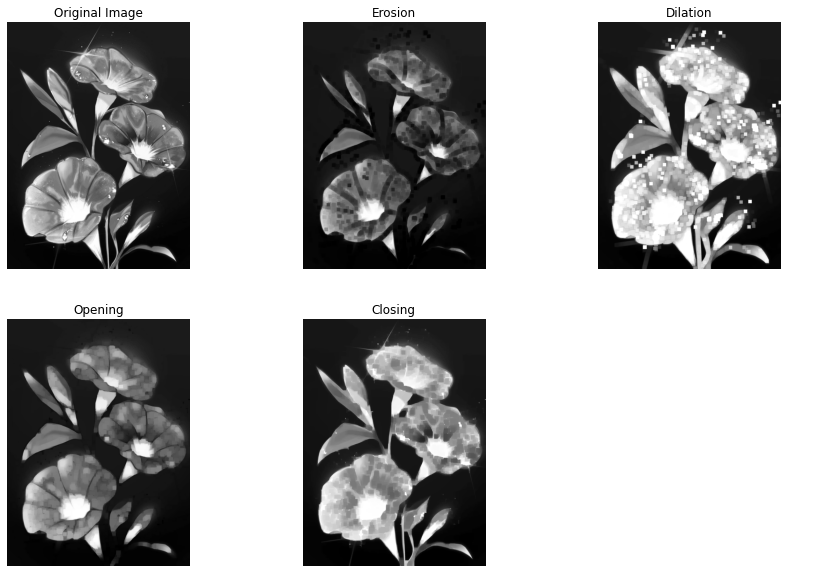

In [23]:
#@title Morphological Operations
# --> By increasing or decreasing the kernel size, you can control the amount of morphological
# processing applied to the image. A larger kernel will have a more significant effect, 
# while a smaller kernel will have a subtler effect.
# --> Modify the kernel shape: Instead of using a square kernel (np.ones), you can try other kernel
# shapes such as cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)) 
# or cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size)). 
# --> The number of iterations for erosion and dilation operations can be changed. 
# A higher number of iterations will cause more aggressive erosion or dilation.

# Define the kernel size
kernel_size = 20

# Create the kernel
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform Erosion
erosion = cv2.erode(image, kernel, iterations=1)

# Perform Dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# Perform Opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform Closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(erosion, cmap='gray')
axs[0, 1].set_title('Erosion')
axs[0, 2].imshow(dilation, cmap='gray')
axs[0, 2].set_title('Dilation')
axs[1, 0].imshow(opening, cmap='gray')
axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='gray')
axs[1, 1].set_title('Closing')

# Remove axis labels
for ax in axs.ravel():
    ax.axis('off')

plt.show()